In [5]:
import numpy as np
import pandas as pd
import dabest

# import from scripts
import os
current_wd = os.getcwd()
os.chdir(os.path.abspath("..\\..\\..\\isttc\\scripts"))
from cfg_global import project_folder_path
os.chdir(current_wd)

In [6]:
print("We're using DABEST v{}".format(dabest.__version__))

We're using DABEST v2025.03.27


In [7]:
dataset_folder = project_folder_path + 'results\\allen_mice\\dataset\\cut_30min\\'
df = pd.read_pickle(dataset_folder + 'summary_taus_plot_5methods_100_resampling_df_wide.pkl')

In [26]:
df['tau_ms_acf_full_log10'] = np.log10(df['tau_ms_acf_full'])
df['tau_ms_isttc_full_log10'] = np.log10(df['tau_ms_isttc_full'])
df

,unit_id,tau_ms_pearsonr,tau_ms_sttc_avg,tau_ms_sttc_concat,tau_ms_acf_full,tau_ms_isttc_full,diff_sttc_avg_sttc_full,diff_sttc_concat_sttc_full,diff_pearsonr_avg_sttc_full,diff_sttc_avg_acf_full,diff_sttc_concat_acf_full,diff_pearsonr_avg_acf_full,tau_ms_acf_full_log10,tau_ms_isttc_full_log10
0,950912119,46.564386,5.534806,5.562063,184.114226,473.197197,2.669932,2.669907,2.630054,2.251831,2.251765,2.138460,2.265087,2.675042
1,950912162,214.248952,280.053184,141.023558,195.775035,223.984163,1.748723,1.918872,0.988345,1.925715,1.738396,1.266559,2.291757,2.350217
2,950912200,1.751765,1.654013,1.788447,0.730223,0.942071,-0.147556,-0.072437,-0.091679,-0.034427,0.024578,0.009256,-0.136544,-0.025916
3,950912241,1.815218,1.759177,1.869278,1.860729,1.410590,-0.457689,-0.338482,-0.392944,-0.993309,-2.068081,-1.341880,0.269683,0.149401
4,950912250,471.187307,514.722908,489.068855,360.881938,504.824564,0.995563,1.197438,1.526821,2.187072,2.107844,2.042597,2.557365,2.703140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656,951190716,220.877858,285.090888,241.573889,152.695829,195.495317,1.952287,1.663499,1.404535,2.121872,1.948795,1.833670,2.183827,2.291136
5657,951190722,294.799454,343.790924,268.558388,255.639093,267.343597,1.883362,0.084501,1.438635,1.945231,1.111239,1.592847,2.407627,2.427070
5658,951190724,351.802930,267.037601,251.360509,325.747165,330.692262,1.803830,1.899447,1.324502,1.768709,1.871495,1.415904,2.512881,2.519424
5659,951190819,111.993738,96.374728,112.651735,170.897140,160.832247,1.809274,1.682871,1.688762,1.872287,1.765262,1.770140,2.232735,2.206373


In [34]:
df['tau_ms_pearsonr_log10'] = np.log10(df['tau_ms_pearsonr'])

In [39]:
sampled_df = df.sample(n=500, random_state=42)

In [40]:
two_groups= dabest.load(sampled_df, idx=("tau_ms_acf_full_log10", "tau_ms_pearsonr_log10"), paired="baseline", id_col="unit_id", resamples=5000)
two_groups.mean_diff

DABEST v2025.03.27
                  
Good afternoon!
The current time is Thu Apr 17 17:17:46 2025.

The paired mean difference for repeated measures against baseline 
between tau_ms_acf_full_log10 and tau_ms_pearsonr_log10 is -0.173 [95%CI -0.255, -0.0997].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

C:\Users\ipochino\AppData\Local\anaconda3\envs\isttc\Lib\site-packages\dabest\plot_tools.py:2537: UserWarning: 73.2% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


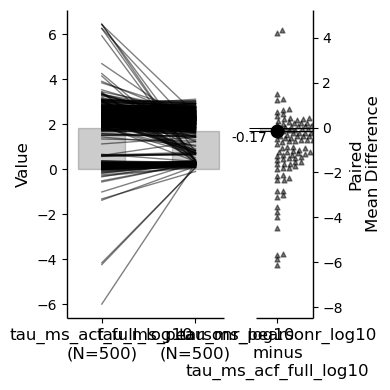

In [41]:
two_groups.mean_diff.plot();